In [137]:
!pip install pymorphy2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [138]:
 # библиотека обработки данных
import pandas as pd

# библиотека линейной алгебры
import numpy as np 

# библиотека векторизации текста
from sklearn.feature_extraction.text import TfidfVectorizer

# библиотеки для классификации в моделях
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC

# библиотеки настройки гиперпараметров
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# библиотеки конвейера и оценщика
from sklearn.pipeline import Pipeline
from sklearn import metrics

# библиотека для леммизации текста
import pymorphy2
from pymorphy2 import MorphAnalyzer

# библиотека для обработки естественного языка
import nltk
from nltk.stem.snowball import SnowballStemmer

# библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns

# библиотека регулярных выражений
import re

# библиотека для работы с .json-файлами
import json

# папка с датасетом
PREFIX = 'DaNetQA/'

In [139]:
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger_ru')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_ru to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_ru is already up-to-
[nltk_data]       date!


True

In [140]:
# загрузка датасета из файлов
train_df = pd.read_json(PREFIX + 'train.jsonl', lines=True)
test_df = pd.read_json(PREFIX + 'test.jsonl', lines=True)
val_df = pd.read_json(PREFIX + 'val.jsonl', lines=True)

In [141]:
# просмотр размера таблиц
print("Количество строк = ", train_df.shape[0], " \nКоличество столбцов = " , train_df.shape[1]) 
print("\nКоличество строк = ", test_df.shape[0], " \nКоличество столбцов = " , test_df.shape[1]) 
print("\nКоличество строк = ", val_df.shape[0], " \nКоличество столбцов = " , val_df.shape[1]) 

Количество строк =  1749  
Количество столбцов =  4

Количество строк =  805  
Количество столбцов =  3

Количество строк =  821  
Количество столбцов =  4


In [142]:
# просмотр списока столбцов
print(train_df.columns)
print(test_df.columns)
print(val_df.columns)

Index(['question', 'passage', 'label', 'idx'], dtype='object')
Index(['question', 'passage', 'idx'], dtype='object')
Index(['question', 'passage', 'label', 'idx'], dtype='object')


In [143]:
# просмотр первых 10 записей
train_df.head(10)

,question,passage,label,idx
0,Вднх - это выставочный центр?,«Вы́ставочный центр» — станция Московского мон...,True,0
1,Вднх - это выставочный центр?,"Вы́ставка достиже́ний наро́дного хозя́йства ,...",True,1
2,Был ли джиган в black star?,Вместе с этим треком они выступили на церемони...,True,2
3,Xiaomi конкурент apple?,"Xiaomi — китайская компания, основанная в 2010...",True,3
4,Был ли автомат калашникова в вов?,Отметив некоторые недостатки и в целом удачную...,False,4
5,Может ли автомобиль ездить на газу?,Автомобиль на природном газе — один из видов а...,True,5
6,Может ли автомобиль ездить на газу?,Для работы на газообразных топливах транспортн...,True,6
7,Был ли автомобиль принцессы дианы в дтп?,Несмотря на продолжительные реанимационные поп...,True,7
8,Есть ли в индийском океане акулы?,"Обыкновенная акула-молот, или молот-рыба — од...",True,8
9,Есть ли в индийском океане акулы?,Ри́фовая аку́ла — единственный вид рода рифов...,True,9


In [144]:
test_df.head(10)

,question,passage,idx
0,Полезна ли ртуть с градусника?,"Отравления ртутью — расстройства здоровья, св...",0
1,Являются ли сапрофаги хищниками?,Фауна лесных почв — совокупность видов животны...,1
2,Водятся ли в индии крокодилы?,"Болотный крокодил, или магер — пресмыкающееся...",2
3,Есть ли в батате крахмал?,"Клубневидно вздутые корни весят до 15 кг, сод...",3
4,Был ли человек в железной маске?,Остров Сент-Маргерит — крупнейший из Лерински...,4
5,Существует ли на самом деле момо?,"Мо́мо — персонаж, получивший широкое распрост...",5
6,Были ли одоакр последним правителем рима?,Они совпадали с таможенной линией и отчасти с ...,6
7,Была ли украина в составе ссср?,Во 2-й пол. 1940-х — 1-й пол. 1950-х годов про...,7
8,Был ли ласточкин в 95 квартале?,С 2019 года участник Лиги Смеха в составе кома...,8
9,Есть ли у скумбрии чешуя?,Ску́мбрии — род рыб семейства скумбриевых отр...,9


In [145]:
val_df.head(10)

,question,passage,label,idx
0,Есть ли вода на марсе?,Гидросфера Марса — это совокупность водных зап...,True,0
1,Состоит ли англия в евросоюзе?,В полночь с 31 января на 1 февраля 2020 года п...,False,1
2,Действительно ли в ссср не было адвокатов?,Семён Львович Ария — советский и российский ю...,False,2
3,Была ли чума в оране?,"Чума — это и абсурд, что осмысливается как фор...",True,3
4,Был ли кетчуп в читосе?,Текущий каталог продукции размещен на сайте пр...,True,4
5,Был ли побег из алькатраса?,ФБР провело крупную операцию по розыску беглец...,True,5
6,Была ли русь под игом?,Данная статья рассматривает ликвидацию ордынск...,True,6
7,Был ли мэллори на эвересте?,Брита́нская экспеди́ция на Джомолу́нгму 1924 г...,True,7
8,Был ли ленин евреем?,По версии американского профессора еврейского ...,True,8
9,Была ли дуня счастлива с минским?,"Уезжая, он предлагает подвезти Дуню до церкви ...",False,9


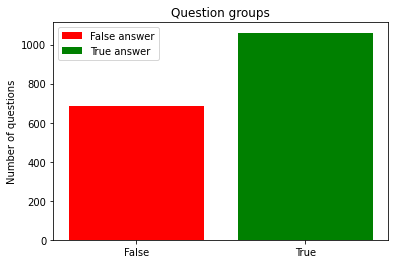

Question description

          idx                                                              
        count         mean         std  min     25%     50%     75%     max
label                                                                      
False   688.0  1075.418605  497.737217  4.0  716.75  1224.5  1474.5  1748.0
True   1061.0   744.035815  466.365516  0.0  365.00   690.0  1053.0  1749.0

               idx
count  1749.000000
mean    874.391081
std     505.449777
min       0.000000
25%     437.000000
50%     874.000000
75%    1312.000000
max    1749.000000


In [146]:
desc = train_df.groupby('label').describe()
plt.bar('False', desc['idx']['count'][0], label="False answer", color='red')
plt.bar('True', desc['idx']['count'][1], label="True answer", color='green')
plt.legend()
plt.ylabel('Number of questions')
plt.title('Question groups')
plt.show()

print('Question description\n')
print(desc)
print()
print(train_df.describe())

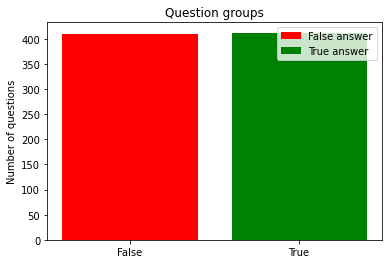

Question description

         idx                                                          
       count        mean         std  min     25%    50%    75%    max
label                                                                 
False  409.0  399.674817  247.240475  1.0  180.00  391.0  625.0  818.0
True   412.0  420.250000  226.517684  0.0  238.25  421.5  610.5  820.0

              idx
count  821.000000
mean   410.000000
std    237.146579
min      0.000000
25%    205.000000
50%    410.000000
75%    615.000000
max    820.000000


In [147]:
desc = val_df.groupby('label').describe()
plt.bar('False', desc['idx']['count'][0], label="False answer", color='red')
plt.bar('True', desc['idx']['count'][1], label="True answer", color='green')
plt.legend()
plt.ylabel('Number of questions')
plt.title('Question groups')
plt.show()

print('Question description\n')
print(desc)
print()
print(val_df.describe())

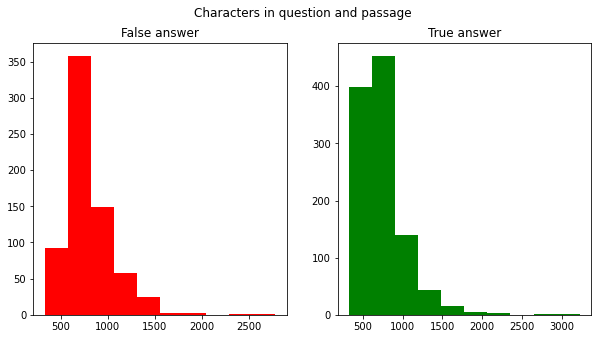

In [148]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,5))

ax1.hist(train_df[train_df['label']==False]['question'].str.len() +
         train_df[train_df['label']==False]['passage'].str.len(), color='red')
ax1.set_title('False answer')

ax2.hist(train_df[train_df['label']==True]['question'].str.len() +
         train_df[train_df['label']==True]['passage'].str.len(), color='green')
ax2.set_title('True answer')

fig.suptitle('Characters in question and passage')
plt.show()

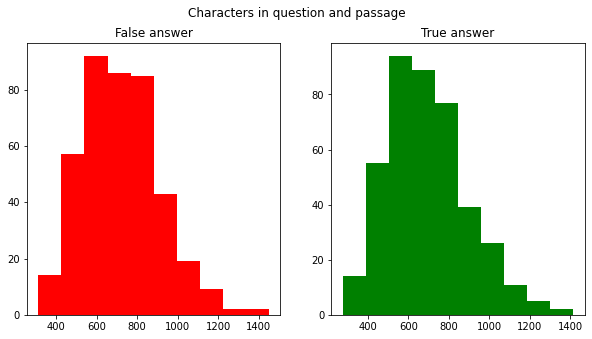

In [149]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,5))

ax1.hist(val_df[val_df['label']==False]['question'].str.len() +
         val_df[val_df['label']==False]['passage'].str.len(), color='red')
ax1.set_title('False answer')

ax2.hist(val_df[val_df['label']==True]['question'].str.len() +
         val_df[val_df['label']==True]['passage'].str.len(), color='green')
ax2.set_title('True answer')

fig.suptitle('Characters in question and passage')
plt.show()

In [150]:
def build_features(dataframe):
  dataframe["text"] = dataframe["question"] + ' ' +  dataframe["passage"]
  dataframe.drop(columns=['idx', 'question', 'passage'], inplace=True) 
  return dataframe

def cleanText(string):
  string = string.lower()
  string = str.replace(string,'Ё','е')
  string = str.replace(string,'ё','е')
  string = re.sub('[/́/g]', '', string) 
  prog = re.compile('[А-Яа-яA-Za-z]+')   
  words = prog.findall(string.lower())

  functionalPos = {'CONJ', 'PRCL'}
  words = [w for w, pos in nltk.pos_tag(words, lang='rus') if pos not in functionalPos]

  stopwords = nltk.corpus.stopwords.words('russian')
  morph = MorphAnalyzer()

  tokens = []
  for token in words:
    if token and token not in stopwords:
      token = token.strip()
      token = morph.normal_forms(token)[0]          
      tokens.append(token)

  return ' '.join(list(tokens))

In [151]:
train_df_f = build_features(train_df)
test_df_f = build_features(test_df)
val_df_f = build_features(val_df)

X_train = list(map(cleanText, np.array(train_df_f.text.values)))
y_train = train_df.label.astype(int).values

X_test = list(map(cleanText, np.array(val_df_f.text.values)))
y_test = val_df.label.astype(int).values

X_pred = list(map(cleanText, np.array(test_df_f.text.values)))

In [152]:
clf_pipeline = Pipeline(
            [("vectorizer", TfidfVectorizer(use_idf=True)),
            ("classifier", LinearSVC())]
        )

clf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()), ('classifier', LinearSVC())])

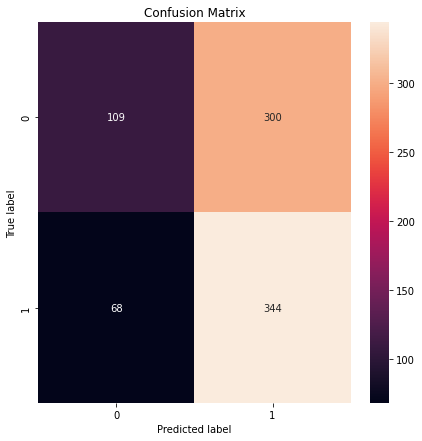

In [153]:
cm = metrics.confusion_matrix(y_test, clf_pipeline.predict(X_test))

def plotConfusionMatrix(cm):
  fig = plt.figure(figsize=(7,7))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion Matrix')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  return None

plotConfusionMatrix(cm)

In [154]:
print(metrics.classification_report(y_test, clf_pipeline.predict(X_test)))
accuracy_base = metrics.accuracy_score(y_test, clf_pipeline.predict(X_test))

              precision    recall  f1-score   support

           0       0.62      0.27      0.37       409
           1       0.53      0.83      0.65       412

    accuracy                           0.55       821
   macro avg       0.57      0.55      0.51       821
weighted avg       0.57      0.55      0.51       821



In [ ]:
parameters = {
              'vectorizer__max_features': (10**3, 10**4),
              'vectorizer__ngram_range': ((1, 2),(2, 3)),
              'classifier__penalty': ('l1','l2'),
              'classifier__C': (range(1,10,2)),
             }

gs_clf = GridSearchCV(clf_pipeline, parameters, scoring='accuracy', cv = 4, n_jobs=-1)
gs_clf.fit(X_train, y_train)

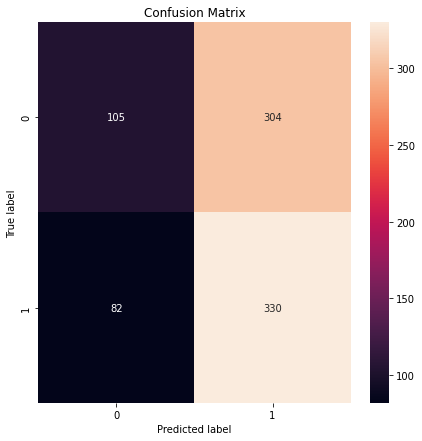

In [156]:
cm = metrics.confusion_matrix(y_test, gs_clf.predict(X_test))
plotConfusionMatrix(cm)

In [157]:
print(metrics.classification_report(y_test, gs_clf.predict(X_test)))
accuracy_gsLSVC = metrics.accuracy_score(y_test, gs_clf.predict(X_test))

              precision    recall  f1-score   support

           0       0.56      0.26      0.35       409
           1       0.52      0.80      0.63       412

    accuracy                           0.53       821
   macro avg       0.54      0.53      0.49       821
weighted avg       0.54      0.53      0.49       821



In [ ]:
parameters = {
              'vectorizer__ngram_range': [(1, 2),(1, 3)],
              'vectorizer__min_df': [0.,.2,.4,.6],
              'classifier__penalty': ('l1','l2'),
              'classifier__C': (range(1,10,2)),
             }

clf_pipeline_LogitReg = Pipeline(
            [("vectorizer", TfidfVectorizer(use_idf=True)),
            ("classifier", LogisticRegression())]
        )

rndgs_clf_LogitReg = RandomizedSearchCV(clf_pipeline_LogitReg, parameters, scoring='accuracy', cv = 4, n_jobs=-1)
rndgs_clf_LogitReg.fit(X_train, y_train)

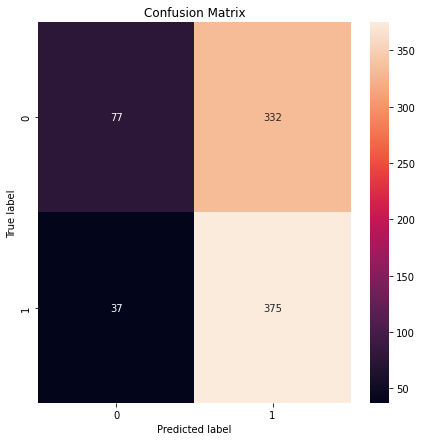

In [169]:
cm = metrics.confusion_matrix(y_test, rndgs_clf_LogitReg.predict(X_test))
plotConfusionMatrix(cm)

In [160]:
print(metrics.classification_report(y_test, rndgs_clf_LogitReg.predict(X_test)))
accuracy_rndLogR = metrics.accuracy_score(y_test, rndgs_clf_LogitReg.predict(X_test))

              precision    recall  f1-score   support

           0       0.74      0.16      0.26       409
           1       0.53      0.94      0.68       412

    accuracy                           0.55       821
   macro avg       0.63      0.55      0.47       821
weighted avg       0.63      0.55      0.47       821



In [ ]:
parameters = {
              'vectorizer__max_features': (10**2, 10**3),
              'vectorizer__ngram_range': [(1, 2),(1, 3)],
              'vectorizer__min_df': [0.,.2,.4,.6,.8],
              'classifier__penalty': ('l1','l2'),
              'classifier__C': (range(1,10,2)),
             }

clf_pipeline_LogitReg = Pipeline(
            [("vectorizer", TfidfVectorizer(use_idf=True)),
            ("classifier", LogisticRegression())]
        )

rndGS_LogR_Adj = RandomizedSearchCV(clf_pipeline_LogitReg, parameters, scoring='accuracy', cv = 4, n_jobs=-1)
rndGS_LogR_Adj.fit(X_train, y_train)

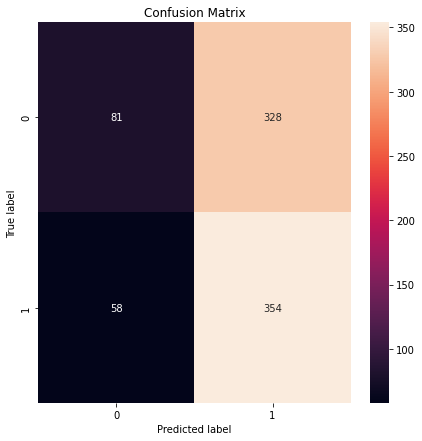

In [183]:
cm = metrics.confusion_matrix(y_test, rndGS_LogR_Adj.predict(X_test))
plotConfusionMatrix(cm)

In [184]:
print(metrics.classification_report(y_test, rndGS_LogR_Adj.predict(X_test)))
accuracy_rndLogR_2 = metrics.accuracy_score(y_test, rndGS_LogR_Adj.predict(X_test))

              precision    recall  f1-score   support

           0       0.58      0.20      0.30       409
           1       0.52      0.86      0.65       412

    accuracy                           0.53       821
   macro avg       0.55      0.53      0.47       821
weighted avg       0.55      0.53      0.47       821



In [185]:
results = pd.DataFrame([accuracy_base, accuracy_gsLSVC, accuracy_rndLogR, accuracy_rndLogR_2], index=['BaseLine', 'GS_LSVC', 'rndGS_LogR', 'rndGS_LogR_Adj'], columns=['accuracy_score'])
results

,accuracy_score
BaseLine,0.551766
GS_LSVC,0.529842
rndGS_LogR,0.552984
rndGS_LogR_Adj,0.529842


In [187]:
test_df["predict"] = gs_clf.predict(X_pred).astype(bool)
test_df.to_json(PREFIX + 'pred.jsonl', orient='records', lines=True)
test_df

,text,predict
0,Полезна ли ртуть с градусника? Отравления ртут...,True
1,Являются ли сапрофаги хищниками? Фауна лесных ...,True
2,Водятся ли в индии крокодилы? Болотный крокоди...,True
3,Есть ли в батате крахмал? Клубневидно вздутые ...,False
4,Был ли человек в железной маске? Остров Сент-М...,True
...,...,...
800,Была ли у джихангира наложница? Хюрре́м Хасеки...,True
801,Правда ли у животных нет групп крови? Гру́ппа ...,False
802,Все ли погибли на титанике? Элизабет Глэдис Ми...,True
803,Есть ли в хлебе белок? Эта статья о группе бел...,True


In [189]:
#библиотека упаковки объектов
import pickle

with open(PREFIX + 'DaNetQA_text_classifier', 'wb') as picklefile:
  pickle.dump(rndgs_clf_LogitReg, picklefile)